## **Project Name:** Petrol Price Forecasting

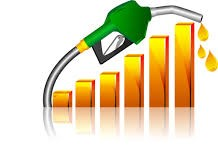

## Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.

### In this project we will try to forecast the different petrol prices for the upcoming dates given to us. 

### We will use LSTM and ARIMA forecasting models to predict the prices.

## Timeline of the project:
- Data Analysis
- Model Building and predictions using ML techniques


In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('train_data.csv')
df

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
...,...,...
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61


In [3]:
df.isnull().sum()            # finding null value

Date            0
Petrol (USD)    2
dtype: int64

In [4]:
df.dropna(inplace=True)     # dropping null value

In [5]:
df.shape

(811, 2)

In [6]:
df.rename(columns={'Petrol (USD)': 'Petrol_Price'}, inplace=True)

In [7]:
df.head()

,Date,Petrol_Price
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


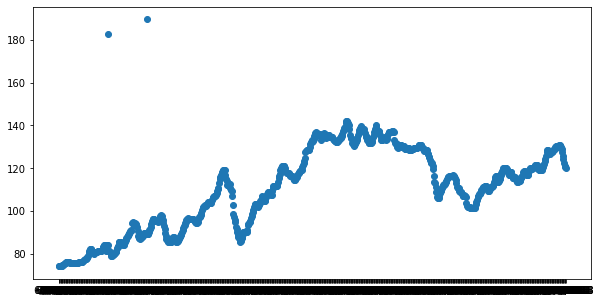

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(df.Date, df.Petrol_Price)

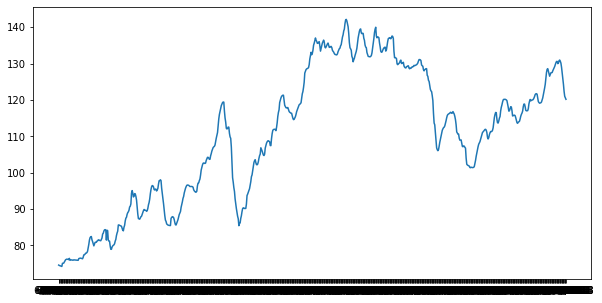

In [9]:
df=df[df.Petrol_Price < 160]
plt.figure(figsize=(10,5))
plt.plot(df.Date, df.Petrol_Price)

In [10]:
df1=df.reset_index()['Petrol_Price']
df1.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol_Price, dtype: float64

# Data Pre-Processing

In [11]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [13]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
print('Train data shape : ',train_data.shape)
print('Test data shape : ', test_data.shape)

Train data shape :  (606, 1)
Test data shape :  (203, 1)


In [15]:
# convert an array of values into a dataset matrix

def create_data(dataset, time_step=1):
    dataX, dataY= [],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]                # i=0, 0,1,2,----99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_data(train_data, time_step)
X_test, ytest = create_data(test_data, time_step)

In [17]:
X_train

array([[0.00559152, 0.00382578, 0.00309005, ..., 0.16627428, 0.16524426,
        0.1640671 ],
       [0.00382578, 0.00309005, 0.00206004, ..., 0.16524426, 0.1640671 ,
        0.16274279],
       [0.00309005, 0.00206004, 0.00103002, ..., 0.1640671 , 0.16274279,
        0.15538552],
       ...,
       [0.9218658 , 0.94599765, 0.96027075, ..., 0.57313125, 0.54223072,
        0.51000589],
       [0.94599765, 0.96027075, 0.96806945, ..., 0.54223072, 0.51000589,
        0.47998823],
       [0.96027075, 0.96806945, 0.93246027, ..., 0.51000589, 0.47998823,
        0.47248381]])

In [18]:
y_train

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [19]:
print(X_train.shape), print(y_train.shape)

(505, 100)
(505,)


(None, None)

# Model Building

# -LSTM

In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 9s 317ms/step - loss: 0.1422 - val_loss: 0.0549
Epoch 2/100
8/8 [==============================] - 1s 139ms/step - loss: 0.0274 - val_loss: 0.0262
Epoch 3/100
8/8 [==============================] - 1s 155ms/step - loss: 0.0163 - val_loss: 0.0099
Epoch 4/100
8/8 [==============================] - 1s 171ms/step - loss: 0.0115 - val_loss: 0.0056
Epoch 5/100
8/8 [==============================] - 1s 174ms/step - loss: 0.0090 - val_loss: 0.0026
Epoch 6/100
8/8 [==============================] - 1s 172ms/step - loss: 0.0073 - val_loss: 0.0025
Epoch 7/100
8/8 [==============================] - 1s 168ms/step - loss: 0.0064 - val_loss: 0.0021
Epoch 8/100
8/8 [==============================] - 1s 168ms/step - loss: 0.0060 - val_loss: 0.0022
Epoch 9/100
8/8 [==============================] - 1s 170ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 10/100
8/8 [==============================] - 1s 169ms/step - loss: 0.0057 - val_loss: 0.0021
Epoch 11/

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

4/4 [==============================] - 0s 30ms/step


In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

114.62937396038501

In [27]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

120.79352955494217

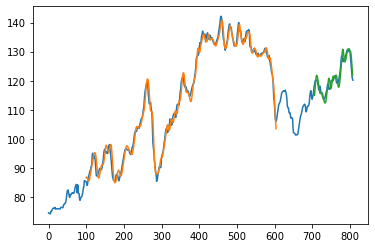

In [28]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**From the above graph we can see that the blue line is our original data line, orange line is our training data line which is perfectly predicting the trend  and the green line is our test data line which also give almost perfect prediction.**

In [29]:
len(test_data)

203

In [30]:
x_input=test_data[103:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.6764273101824605,
 0.6759858740435554,
 0.6767216009417307,
 0.67554443790465,
 0.6740729841082991,
 0.6708357857563274,
 0.6583284284873456,
 0.6447910535609185,
 0.6286050618010597,
 0.6299293702177753,
 0.6375809299587996,
 0.6465567981165394,
 0.6455267804590936,
 0.6305179517363158,
 0.6090347263095939,
 0.6100647439670397,
 0.6118304885226606,
 0.6122719246615658,
 0.6103590347263097,
 0.6019717480871103,
 0.5918187168922899,
 0.5816656856974691,
 0.5793113596233079,
 0.5838728663919954,
 0.5853443201883461,
 0.5878457916421425,
 0.5969688051795174,
 0.6080047086521485,
 0.6155091230135377,
 0.6208063566804005,
 0.6288993525603299,
 0.6464096527369043,
 0.6568569746909947,
 0.6571512654502651,
 0.646262507357269,
 0.6319894055326665,
 0.6297822248381404,
 0.6302236609770455,
 0.6305179517363158,
 0.6380223660977047,
 0.6577398469688054,
 0.6689228958210713,
 0.6756915832842849,
 0.670100058858152,
 0.6724543849323132,
 0.6734844025897588,
 0.6737786933490291,
 0.67657445556209

In [32]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<20):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.649776]
101
1 day input [0.67598587 0.6767216  0.67554444 0.67407298 0.67083579 0.65832843
 0.64479105 0.62860506 0.62992937 0.63758093 0.6465568  0.64552678
 0.63051795 0.60903473 0.61006474 0.61183049 0.61227192 0.61035903
 0.60197175 0.59181872 0.58166569 0.57931136 0.58387287 0.58534432
 0.58784579 0.59696881 0.60800471 0.61550912 0.62080636 0.62889935
 0.64640965 0.65685697 0.65715127 0.64626251 0.63198941 0.62978222
 0.63022366 0.63051795 0.63802237 0.65773985 0.6689229  0.67569158
 0.67010006 0.67245438 0.6734844  0.67377869 0.67657446 0.68143025
 0.68790465 0.6958505  0.69864626 0.69923484 0.69702766 0.68143025
 0.66715715 0.66333137 0.66068275 0.66156563 0.6624485  0.66539141
 0.67319011 0.68201883 0.69496763 0.70644497 0.72189523 0.7373455
 0.7610359  0.78531489 0.79782225 0.80047087 0.79031783 0.77942908
 0.77001177 0.77633902 0.78369629 0.78413773 0.78472631 0.79178929
 0.79723367 0.80311948 0.80885815 0.81739258 0.82445556 0.82960565
 0.82960565 0.82062978 0.82313125 0.

9 day output [[0.47034788]]
10 day input [0.63758093 0.6465568  0.64552678 0.63051795 0.60903473 0.61006474
 0.61183049 0.61227192 0.61035903 0.60197175 0.59181872 0.58166569
 0.57931136 0.58387287 0.58534432 0.58784579 0.59696881 0.60800471
 0.61550912 0.62080636 0.62889935 0.64640965 0.65685697 0.65715127
 0.64626251 0.63198941 0.62978222 0.63022366 0.63051795 0.63802237
 0.65773985 0.6689229  0.67569158 0.67010006 0.67245438 0.6734844
 0.67377869 0.67657446 0.68143025 0.68790465 0.6958505  0.69864626
 0.69923484 0.69702766 0.68143025 0.66715715 0.66333137 0.66068275
 0.66156563 0.6624485  0.66539141 0.67319011 0.68201883 0.69496763
 0.70644497 0.72189523 0.7373455  0.7610359  0.78531489 0.79782225
 0.80047087 0.79031783 0.77942908 0.77001177 0.77633902 0.78369629
 0.78413773 0.78472631 0.79178929 0.79723367 0.80311948 0.80885815
 0.81739258 0.82445556 0.82960565 0.82960565 0.82062978 0.82313125
 0.83284285 0.83534432 0.83034138 0.82254267 0.80532666 0.78266627
 0.75868158 0.73705121

17 day output [[0.39529175]]
18 day input [0.61035903 0.60197175 0.59181872 0.58166569 0.57931136 0.58387287
 0.58534432 0.58784579 0.59696881 0.60800471 0.61550912 0.62080636
 0.62889935 0.64640965 0.65685697 0.65715127 0.64626251 0.63198941
 0.62978222 0.63022366 0.63051795 0.63802237 0.65773985 0.6689229
 0.67569158 0.67010006 0.67245438 0.6734844  0.67377869 0.67657446
 0.68143025 0.68790465 0.6958505  0.69864626 0.69923484 0.69702766
 0.68143025 0.66715715 0.66333137 0.66068275 0.66156563 0.6624485
 0.66539141 0.67319011 0.68201883 0.69496763 0.70644497 0.72189523
 0.7373455  0.7610359  0.78531489 0.79782225 0.80047087 0.79031783
 0.77942908 0.77001177 0.77633902 0.78369629 0.78413773 0.78472631
 0.79178929 0.79723367 0.80311948 0.80885815 0.81739258 0.82445556
 0.82960565 0.82960565 0.82062978 0.82313125 0.83284285 0.83534432
 0.83034138 0.82254267 0.80532666 0.78266627 0.75868158 0.73705121
 0.70865215 0.68878752 0.68275456 0.67642731 0.64977598 0.63093066
 0.6136595  0.59617859

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,121)

In [34]:
len(df1)

809

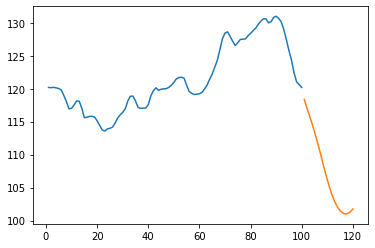

In [35]:
plt.plot(day_new,scaler.inverse_transform(df1[709:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

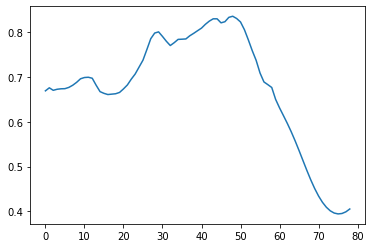

In [36]:
df2=df1.tolist()
df2.extend(lst_output)
plt.plot(df2[750:])

In [37]:
df2=scaler.inverse_transform(df2).tolist()

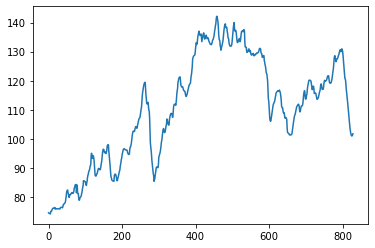

In [38]:
plt.plot(df2)

# -ARIMA

In [39]:
df.head()

,Date,Petrol_Price
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [40]:
df1=df.reset_index()['Petrol_Price']
df1.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol_Price, dtype: float64

In [41]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [42]:
model1 = ARIMA(df1.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=20)
output1

array([119.80670599, 119.52143354, 119.30634698, 119.14818606,
       119.02925494, 118.93899218, 118.87071727, 118.81917634,
       118.78030454, 118.75097726, 118.72884029, 118.71213019,
       118.69951766, 118.68999841, 118.68281381, 118.67739119,
       118.6732984 , 118.67020933, 118.66787782, 118.6661181 ])

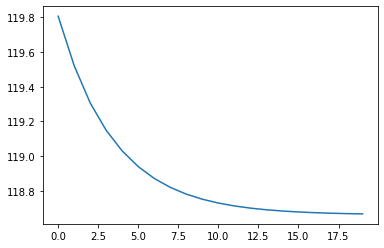

In [43]:
plt.plot(output1)

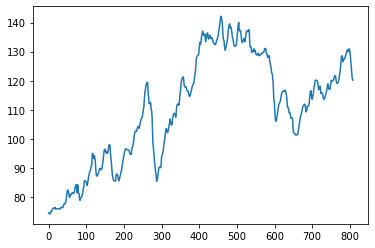

In [44]:
plt.plot(df1)

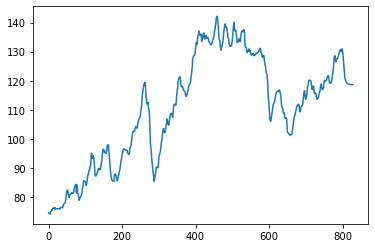

In [46]:
df2=df1.tolist()
df2.extend(output1)
plt.plot(df2)